# Estimer une probabilité de dépassement de seuil - Application au cas de la poutre en flexion

## Introduction

Soit $X = (X_1,..., X_d)\in\mathbb{R}^d$ le vecteur aléatoire d’entrée. On note $f$ la densité de probabilité de la variable $X$. 

Soit $g$ une fonction de $\mathbb{R}^d$ vers $\mathbb{R}$. On souhaite estimer la variable aléatoire :
$$
Y = g(X).
$$

Soit $s\in\mathbb{R}$ un seuil donné. Nous souhaitons estimer la probabilité :
$$
P_f = P(Y > s).
$$
Bien sûr, nous pourrions considérer que cette probabilité peut se calculer comme l'espérance d'une fonction indicatrice. 
En effet, soit $\mathbb{1}_{Y>s}$ la fonction indicatrice définie par :
\begin{align}
\mathbb{1}_{Y>s}
= \left\{
\begin{array}{l}
1, \textrm{ si } Y>s, \\
0, \textrm{ sinon}.
\end{array}
\right.
\end{align}

Alors, la probabilité $P_f$ est l'espérance de la fonction indicatrice :
$$
P_f = E\left(\mathbb{1}_{Y>s}\right) = \int \mathbb{1}_{Y>s}(x) f(x) dx.
$$

En fait, une telle formulation pose souvent des difficultés. La plus importante est qu'il peut s'avérer que la probabilité recherchée est faible, ce qui peut nécessiter des méthodes spécifiques.

## Estimer une probabilité avec la méthode de Monte-Carlo simple

Soit $n$ un entier représentant la taille de l'échantillon. 
Soient $y_1,...,y_n$ des réalisations indépendantes 
de la variable $Y$, pour $i=1,2,...,n$. 

Soit $Z_i$ la variable dont les réalisations sont 
$$
z_i=
\left\{
\begin{array}{l}
1\textrm{ si } y_i>s\\
0\textrm{ sinon.}
\end{array}
\right.
$$
La variable $Z_i$ est une variable de Bernoulli de paramètre $P_f$. 
Par conséquent, son espérance est $P_f$ et sa variance est $P_f(1-P_f)$.

Soit $b_n$ la variable définie par:
$$
b_n=z_1+z_2+...+z_n.
$$
La probabilité de dépassement $P_f$ est estimée par
$$
\tilde{P}_f=\frac{b_n}{n}.
$$
La variable 
$$
B_n = Z_1+Z_2+\ldots+Z_n
$$ 
est une variable binomiale de paramètres $P_f$ et $n$. 
Par conséquent, son espérance est $nP_f$ et sa variance est $nP_f(1-P_f)$. 
L'espérance de la variable 
$$
\tilde{P}_f=\frac{B_n}{n}
$$
est donc $P_f$ et sa variance est $P_f(1-P_f)/n$. 

Le théorème limite central implique que la variable aléatoire $\tilde{P}_f$ converge en distribution vers la loi gaussienne. 
Plus précisément :
$$
\sqrt{n}(\tilde{P}_f - P_f) \xrightarrow{d} \mathcal{N}(0,P_f(1-P_f)).
$$
Par conséquent,
$$
\tilde{P}_f - P_f \xrightarrow{d} \mathcal{N}\left(0,\frac{P_f(1-P_f)}{n}\right)
$$
ce qui implique :
$$
\tilde{P}_f \xrightarrow{d} \mathcal{N}\left(P_f,\frac{P_f(1-P_f)}{n}\right).
$$

On pourrait exprimer directement un intervalle de confiance pour 
cette variable aléatoire. 
La tradition consiste à l'exprimer en fonction d'une loi normale standard. 
En effet, le T.C.L. implique :
$$
\sqrt{\frac{n}{P_f(1-P_f)}}\left(\tilde{P}_f - P_f\right) \xrightarrow{d} \mathcal{N}(0,1).
$$
Soit $q_{\alpha/2}$ le quantile d'ordre $\alpha/2$ de la loi normale standard :
$$
q_{\alpha/2}=\Phi^{-1}(\alpha/2),
$$
où $\Phi$ est la fonction de répartition de la loi gaussienne 
de moyenne nulle et d'écart-type unité. 
Soit l'intervalle 
$$
I_n = \left[\tilde{P}_f-\Delta_n,\tilde{P}_f+\Delta_n\right].
$$
avec
$$
\Delta_n = q_{\alpha/2}\sqrt{\frac{\tilde{P}_f(1-\tilde{P}_f)}{n}}.
$$
Alors $I_n$ est un intervalle de confiance approché à $1-\alpha$ 
pour la proportion $P_f$, c'est à dire que
$$
P(I_n\ni P_f) \approx 1-\alpha.
$$
L'approximation vient du fait qu'on remplace la variance 
exacte $P_f(1-P_f)/n$ qui dépend de la valeur 
inconnue $P_f$ par son estimation $\tilde{P}_f(1-\tilde{P}_f)/n$.

## Déviation  verticale d'une poutre encastrée

We consider a cantilever beam defined by its Young’s modulus $E$, its length $L$ and its section modulus $I$. One end is built in a wall and we apply a concentrated bending load $F$ at the other end of the beam, resulting in a vertical deviation $Y$.

<img src="poutre.png" width="200">

__Inputs__:  $\left\{ E, F, L, I \right\} $
* $E$ : Young modulus (Pa)
* $F$ : Loading (N),
* $L$ : Length of beam (cm),
* $I$ : Moment of inertia (cm^4).

|Variable|  Distribution|
| ------------- |-------------|
|E|  Beta(r = 0.9, t = 3.5, a = $2.5\times 10^7$, $b = 5\times 10^7$) |
|F| Lognormal($\mu_F=3 \times 10^4$, $\sigma_F=9\times 10^3$, shift=$15\times 10^3$)|
|L|Uniform(min=250.0, max= 260.0)|
|I| Beta(r = 2.5, t = 4.0, a = 310, b = 450)|

In the previous table $\mu_F=E(F)$ and $\sigma_F=\sqrt{V(F)}$ are the mean and the standard deviation of $F$.

The input variables are supposed to be independent.

__Output__:

The vertical displacement at free end of the cantilever beam is:
$$
Y  = \dfrac{F\, L^3}{3 \, E \, I}
$$
It is considered that failure occurs when the beam deviation is greater than 30 cm:
$$
Y \geq 30 \textrm{ (cm)}
$$
With a Monte-Carlo sample size equal to 7 120 000, we get:
$$
P(Y\geq 30) = 0.005590.
$$
The 95% confidence interval is 
$$
P([0.005536,0.005645]\ni P_f)=0.95.
$$

# Model definition

In [40]:
import openturns as ot
import numpy as np

In [6]:
dist_E = ot.Beta(0.9, 3.1, 2.8e7, 4.8e7)
dist_E.setDescription(["E"])
F_para = ot.LogNormalMuSigma(3.0e4, 9.0e3, 15.0e3) # in N
dist_F = ot.ParametrizedDistribution(F_para)
dist_F.setDescription(["F"])
dist_L = ot.Uniform(250., 260.) # in cm
dist_L.setDescription(["L"])
dist_I = ot.Beta(2.5, 4, 310., 450.) # in cm^4
dist_I.setDescription(["I"])

X = ot.ComposedDistribution([dist_E, dist_F, dist_L, dist_I])

In [7]:
g = ot.SymbolicFunction( ["E","F","L","I"],["F* L^3 /  (3 * E * I)"])
g.setOutputDescription(["Y (cm)"])

Pour pouvoir exploiter au mieux les simulations, nous équipons la fonction d'un méchanisme d'historique.

In [8]:
g = ot.MemoizeFunction(g)

Enfin, nous définissons le vecteur aléatoire de sortie.

In [9]:
XRV = ot.RandomVector(X)
Y = ot.RandomVector(g, XRV)
Y.setDescription(['Y (cm)'])

## Par Monte-Carlo simple avec un budget fixé

La manière la plus simple de faire une telle étude consiste à fixer le nombre de simulations à l'avance. En d'autres termes, on fixe $n$ et on génère un échantillon de la variable de sortie $Y$ de taille $n$. C'est la méthode "traditionnelle".

In [49]:
n = 100000

In [31]:
Ysample = Y.getSample(n)

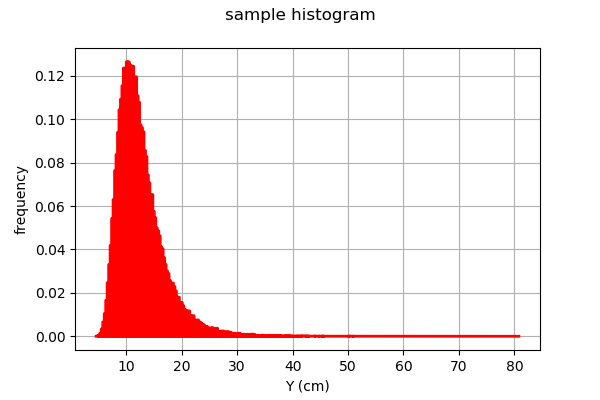

In [32]:
graph = ot.VisualTest_DrawHistogram(Ysample)
graph.setXTitle("Y (cm)")
graph.setLegends([""])
graph

La probabilité recherchée peut être calculée en évaluant la fonction de répartition complémentaire de l'échantillon.

In [33]:
pf = Ysample.computeEmpiricalCDF([30.],True)
pf

0.00581

In [45]:
alpha = 0.05

In [46]:
f = ot.DistFunc_qNormal(alpha/2,True)
f

1.959963984540054

In [50]:
delta = f * np.sqrt(pf*(1-pf)/n)
delta

0.0004710541697101899

In [51]:
print("%f confidence interval = [%f,%f]" % (1-alpha,pf-delta,pf+delta))

0.950000 confidence interval = [0.005339,0.006281]


In [52]:
pf_dist = ot.Normal(pf,np.sqrt(pf*(1-pf)/n))
pf_dist

class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[0.00581] sigma=class=Point name=Unnamed dimension=1 values=[0.000240338] correlationMatrix=class=CorrelationMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[1]

In [61]:
bounds = pf_dist.computeBilateralConfidenceInterval(1-alpha)
bounds

class=Interval name=Unnamed dimension=1 lower bound=class=Point name=Unnamed dimension=1 values=[0.00533895] upper bound=class=Point name=Unnamed dimension=1 values=[0.00628105] finite lower bound=[1] finite upper bound=[1]

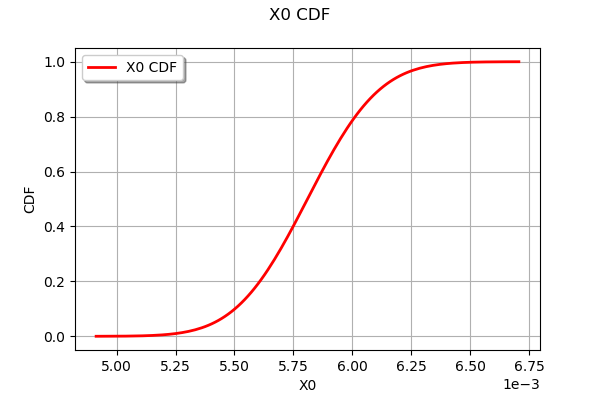

In [62]:
pf_dist.drawCDF()

In [63]:
pf_dist.computeCDF(bounds.getLowerBound()[0])

0.02500000000000004

In [64]:
pf_dist.computeCDF(bounds.getUpperBound()[0])

0.975